# Using CNVpytor from Python 

This document contains example how to use CNVpytor as Python library. For more details check API documentation or use Python buildin help() function. 

# Imorting and precessing RD data

In [1]:
import cnvpytor

In [2]:
print(cnvpytor.__version__)

1.0


Set up logger to monitor progress (level and format):

In [3]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')
logger = logging.getLogger('cnvpytor')

Information about any function can be obtained with Python buildin help() function:

In [4]:
help(cnvpytor.Root.rd)

Help on function rd in module cnvpytor.root:

rd(self, bamfiles, chroms=[], reference_filename=False)
    Read chromosomes from bam/sam/cram file(s) and store in cnvpytor file.
    
    Parameters
    ----------
    bamfiles : list of str
        List of bam/sam/cram files
    chroms : list of str
        List of chromosomes. Import all available if empty.
    reference_filename : str
        Only for CRAM files - reference genome filename



To create new root class:

In [5]:
app = cnvpytor.Root("test.pytor", create=True, max_cores=24)

Create list of chromosomes to import (if not specify, rd function will import all available in bam file):

In [6]:
chroms=[str(i) for i in range(1,23)]+["X","Y"]
print(chroms)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y']


To import RD signal from bam file, index file (bam.bai) is required:

In [7]:
app.rd(["test.bam"], chroms=chroms)

2020-02-25 04:24:33,284 - cnvpytor.bam - INFO - File: test.bam successfully open
2020-02-25 04:24:33,285 - cnvpytor.bam - INFO - Detected reference genome: hg19
2020-02-25 04:24:33,289 - cnvpytor.pool - INFO - Parallel processing using 24 cores
2020-02-25 04:24:35,252 - cnvpytor.root - INFO - Reading data for chromosome 1 with length 249250621
2020-02-25 04:24:35,253 - cnvpytor.root - INFO - Reading data for chromosome 2 with length 243199373
2020-02-25 04:24:35,254 - cnvpytor.root - INFO - Reading data for chromosome 3 with length 198022430
2020-02-25 04:24:35,255 - cnvpytor.root - INFO - Reading data for chromosome 4 with length 191154276
2020-02-25 04:24:35,257 - cnvpytor.root - INFO - Reading data for chromosome 5 with length 180915260
2020-02-25 04:24:35,258 - cnvpytor.root - INFO - Reading data for chromosome 6 with length 171115067
2020-02-25 04:24:35,259 - cnvpytor.root - INFO - Reading data for chromosome 7 with length 159138663
2020-02-25 04:24:35,260 - cnvpytor.root - INFO -

Calculate histograms with bin sizes 10kbp and 100kbp:

In [8]:
app.calculate_histograms([10000, 100000])

2020-02-25 04:33:24,133 - cnvpytor.root - INFO - Calculating histograms using bin size 10000 for chromosome '1'.
2020-02-25 04:33:24,521 - cnvpytor.root - INFO - Chromosome '1' bin size 10000 stat - RD parity distribution gaussian fit:  2942.35 +- 111.39
2020-02-25 04:33:24,522 - cnvpytor.root - INFO - Chromosome '1' bin size 10000 stat - RD unique distribution gaussian fit:  2929.11 +- 110.99
2020-02-25 04:33:24,523 - cnvpytor.root - INFO - Calculating histograms using bin size 10000 for chromosome '2'.
2020-02-25 04:33:24,884 - cnvpytor.root - INFO - Chromosome '2' bin size 10000 stat - RD parity distribution gaussian fit:  2929.54 +- 112.14
2020-02-25 04:33:24,885 - cnvpytor.root - INFO - Chromosome '2' bin size 10000 stat - RD unique distribution gaussian fit:  2916.93 +- 110.52
2020-02-25 04:33:24,886 - cnvpytor.root - INFO - Calculating histograms using bin size 10000 for chromosome '3'.
2020-02-25 04:33:25,200 - cnvpytor.root - INFO - Chromosome '3' bin size 10000 stat - RD pari

Calculate partition for the same bin sizes:

In [9]:
app.partition([10000, 100000])

2020-02-25 04:35:05,147 - cnvpytor.root - INFO - Calculating partition using bin size 10000 for chromosome '1'.
2020-02-25 04:35:18,033 - cnvpytor.root - INFO - Calculating partition using bin size 10000 for chromosome '2'.
2020-02-25 04:35:31,321 - cnvpytor.root - INFO - Calculating partition using bin size 10000 for chromosome '3'.
2020-02-25 04:35:42,075 - cnvpytor.root - INFO - Calculating partition using bin size 10000 for chromosome '4'.
2020-02-25 04:35:52,507 - cnvpytor.root - INFO - Calculating partition using bin size 10000 for chromosome '5'.
2020-02-25 04:36:02,560 - cnvpytor.root - INFO - Calculating partition using bin size 10000 for chromosome '6'.
2020-02-25 04:36:11,813 - cnvpytor.root - INFO - Calculating partition using bin size 10000 for chromosome '7'.
2020-02-25 04:36:21,056 - cnvpytor.root - INFO - Calculating partition using bin size 10000 for chromosome '8'.
2020-02-25 04:36:29,416 - cnvpytor.root - INFO - Calculating partition using bin size 10000 for chromoso

Calculate and print CNV calls:

In [10]:
calls=app.call([10000,100000])

In [11]:
for bin_size in calls:
    for call in calls[bin_size]:
        print(("{:13}{:>5}{:10}{:10}{:10}{:15.2f}{:15.2e}{:15.2e}").format(*tuple(call)))

deletion         1    180001    220000     40000           0.00       3.92e-07       0.00e+00
deletion         1    260001    330000     70000           0.21       5.54e+00       0.00e+00
deletion         1    470001    520000     50000           0.02       1.50e-02       0.00e+00
deletion         1   2640001   2680000     40000           0.00       3.92e-07       0.00e+00
deletion         1   3850001   4000000    150000           0.03       7.86e-11       0.00e+00
deletion         1  13050001  13170000    120000           0.40       6.92e-01       2.67e-25
deletion         1  13220001  13320000    100000           0.00       0.00e+00       0.00e+00
deletion         1  13480001  13640000    160000           0.34       8.53e-05       0.00e+00
deletion         1  13700001  13780000     80000           0.61       1.50e-01       1.17e-67
duplication      1  16830001  17120000    290000           2.54       5.78e-04       0.00e+00
deletion         1  17120001  17180000     60000           0

# Imorting and precessing RD data

Import SNP data from VCF file:

In [12]:
app.vcf(["test.vcf.gz"],chroms=chroms,use_index=True)

2020-02-25 04:38:46,333 - cnvpytor.vcf - INFO - File: test.vcf.gz successfully open
2020-02-25 04:38:46,334 - cnvpytor.root - INFO - Reading variant data for chromosome 1
2020-02-25 04:38:55,565 - cnvpytor.io - INFO - Saving SNP data for chromosome '1'.
2020-02-25 04:38:55,853 - cnvpytor.io - INFO - Detecting RD data in file 'test.pytor' for the same chromosome.
2020-02-25 04:38:57,031 - cnvpytor.root - INFO - Reading variant data for chromosome 2
2020-02-25 04:39:06,378 - cnvpytor.io - INFO - Saving SNP data for chromosome '2'.
2020-02-25 04:39:06,696 - cnvpytor.io - INFO - Detecting RD data in file 'test.pytor' for the same chromosome.
2020-02-25 04:39:08,198 - cnvpytor.root - INFO - Reading variant data for chromosome 3
2020-02-25 04:39:16,443 - cnvpytor.io - INFO - Saving SNP data for chromosome '3'.
2020-02-25 04:39:16,715 - cnvpytor.io - INFO - Detecting RD data in file 'test.pytor' for the same chromosome.
2020-02-25 04:39:17,816 - cnvpytor.root - INFO - Reading variant data for

Introduce P region mask. This step use strict mask from 1kG project. For hg19 and hg38 this mask data is provided with CNVpythor: 

In [13]:
app.mask_snps()

2020-02-25 04:41:06,123 - cnvpytor.root - INFO - Masking SNP data for chromosome '1'.
2020-02-25 04:41:13,742 - cnvpytor.io - INFO - Saving SNP data for chromosome '1'.
2020-02-25 04:41:15,547 - cnvpytor.root - INFO - Masking SNP data for chromosome '2'.
2020-02-25 04:41:23,306 - cnvpytor.io - INFO - Saving SNP data for chromosome '2'.
2020-02-25 04:41:25,360 - cnvpytor.root - INFO - Masking SNP data for chromosome '3'.
2020-02-25 04:41:32,122 - cnvpytor.io - INFO - Saving SNP data for chromosome '3'.
2020-02-25 04:41:33,651 - cnvpytor.root - INFO - Masking SNP data for chromosome '4'.
2020-02-25 04:41:40,760 - cnvpytor.io - INFO - Saving SNP data for chromosome '4'.
2020-02-25 04:41:42,491 - cnvpytor.root - INFO - Masking SNP data for chromosome '5'.
2020-02-25 04:41:48,846 - cnvpytor.io - INFO - Saving SNP data for chromosome '5'.
2020-02-25 04:41:50,272 - cnvpytor.root - INFO - Masking SNP data for chromosome '6'.
2020-02-25 04:41:56,401 - cnvpytor.io - INFO - Saving SNP data for ch

Calculate baf hisotgrams and likelihood function:

In [14]:
app.calculate_baf([10000, 100000])

2020-02-25 04:43:03,727 - cnvpytor.root - INFO - Calculating BAF histograms for chromosome '1'.
2020-02-25 04:44:05,659 - cnvpytor.root - INFO - Saving BAF histograms with bin size 10000 for chromosome '1'.
2020-02-25 04:44:06,790 - cnvpytor.root - INFO - Saving BAF histograms with bin size 100000 for chromosome '1'.
2020-02-25 04:44:06,888 - cnvpytor.root - INFO - Calculating BAF histograms for chromosome '2'.
2020-02-25 04:45:15,141 - cnvpytor.root - INFO - Saving BAF histograms with bin size 10000 for chromosome '2'.
2020-02-25 04:45:16,386 - cnvpytor.root - INFO - Saving BAF histograms with bin size 100000 for chromosome '2'.
2020-02-25 04:45:16,492 - cnvpytor.root - INFO - Calculating BAF histograms for chromosome '3'.
2020-02-25 04:46:13,855 - cnvpytor.root - INFO - Saving BAF histograms with bin size 10000 for chromosome '3'.
2020-02-25 04:46:14,828 - cnvpytor.root - INFO - Saving BAF histograms with bin size 100000 for chromosome '3'.
2020-02-25 04:46:14,917 - cnvpytor.root - I

## View content of cnvpytor file

Initialise Viewer:

In [15]:
view = cnvpytor.Viewer(["test.pytor"],params={})
view.bin_size = 100000

List content of file/files:

In [16]:
view.ls()


Filename 'test.pytor'
---------------------
File created: 2020-02-25 04:24 using CNVpytor ver 1.0

Chromosomes with RD signal: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, X, Y

Chromosomes with SNP signal: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, X

Using reference genome: hg19 [ GC: yes, mask: yes ]

Chromosomes with RD histograms [bin sizes]: 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 20, 21, 22, 2, 3, 4, 5, 6, 7, 8, 9, X, Y [10000, 100000]

Chromosomes with SNP histograms [bin sizes]: 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1, 20, 21, 22, 2, 3, 4, 5, 6, 7, 8, 9, X [10000, 100000]

Chromosome lengths: {'1': '249250621', '2': '243199373', '3': '198022430', '4': '191154276', '5': '180915260', '6': '171115067', '7': '159138663', '8': '146364022', '9': '141213431', '10': '135534747', '11': '135006516', '12': '133851895', '13': '115169878', '14': '107349540', '15': '102531392', '16': '90354753', '17': '81195210', '1

List meta tags:

In [17]:
view.meta()

BAM: test.bam
Date: 2020-02-25 04:24
VCF: test.vcf.gz
Version: 1.0


Use Viewer to genotype regions:

In [18]:
result = view.genotype([10000,100000],"1:10M-11M,2:10M-12M,2:25000k-25500k")
print(result)

[['1', 10000000, 11000000, 1.9635118453714588, 1.9646270246664161], ['2', 10000000, 12000000, 2.028992656219949, 2.030728677875149], ['2', 25000000, 25500000, 1.9751703514465921, 1.9731440147975268]]


Setup Jupyter backend to svg to achive better resolution:

In [19]:
%config InlineBackend.figure_format = 'svg'

Plot manhattan plot:

In [20]:
view.rd_use_mask = True # Use P mask to reduce noise
view.manhattan()

Plot global rd plot:

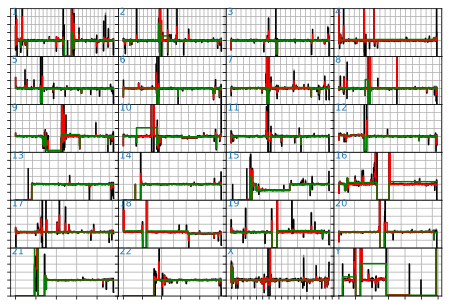

In [21]:
view.rd_use_mask = False
view.rd()

Plot baf likelihood plot:

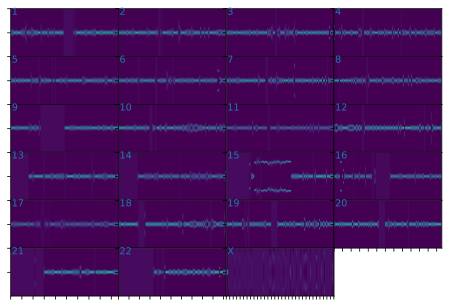

In [22]:
view.likelihood()

Plot specific region with multiple signals:

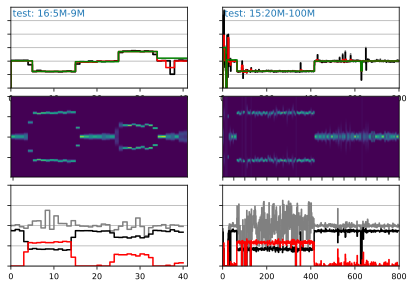

In [23]:
view.panels=["rd","likelihood","baf"]
view.grid=[2,1] # specify grid 2 x 1
view.multiple_regions(["16:5M-9M","15:20M-100M"])

With different bin_size:

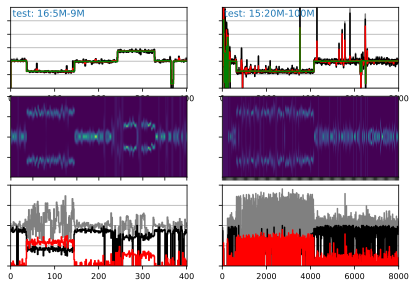

In [24]:
view.bin_size = 10000
view.multiple_regions(["16:5M-9M","15:20M-100M"])

Statisticaly compare two regions:

test.pytor	15:30M-50M	1:30M-50M	1794.9027	72.3474	2892.4575	93.2595	0.000000e+00	0.6205	0.0010


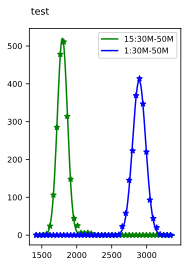

In [25]:
view.compare("15:30M-50M","1:30M-50M", plot=True, n_bins=41)

The end of notebook.